# Homework specifications


Building upon the previous tasks of data preparation, cleaning, and exploratory analysis, you are now required to further your analysis by developing and testing different machine learning algorithms. These algorithms are aimed at predicting specific outcomes based on the dataset. You must implement these algorithms from scratch and may use machine learning frameworks only for verifying the quality of your results.

Algorithms to Implement:
* Linear Regression: To predict the Weight of individuals based on the available attributes.
* Decision Trees for Binary Classification: To classify individuals into two categories of obesity levels (NObesity attribute) based on the available attributes.
* Logistic Regression: To classify individuals into two categories of obesity levels (NObesity attribute).
* K-Nearest Neighbors (KNN): To classify individuals into two categories of obesity levels (NObesity attribute).
* Neural Network: To perform regression in order to predict the Weight of individuals based on available attributes.

The model should be flexible and allow for a variable number of layers and a variable number of neurons for each layer. These two are hyperparameters of the NN as well as the other "more traditional" hyperparameters.

Data Preparation:
* Categorical attributes defined as strings must be encoded before being used as input to the algorithms. You may choose an appropriate encoding method.
* For regression problems, predict the attribute Weight.
* For classification, predict the attribute NObesity. Binarize the NObesity attribute such that categories below and including "Overweight" are encoded as 0, and the rest are encoded as 1.

Implementation Guidelines:
* Your implementations must not use any external machine learning frameworks except for verifying the results. For example, you can use scikit-learn to double check your results but not to fit thye model.
* External frameworks can be used to do everything except build the model. For instance, you can use Pandas to manage dataframes, or you can use scikit-learn to evaluate the performance of your algorithms.
* For each algorithm, you must tune the hyperparameters. Demonstrate where and how you've performed hyperparameter tuning. While exhaustive search is not required, you should clearly indicate the process of hyperparameter tuning and how it can be extended to explore more options.
* Ensure that your notebook runs from beginning to end without errors.

Critical Analysis:
* Conclude your notebook with a critical analysis section. This should include observations drawn from your experiments with the implemented algorithms. Discuss the performance, strengths, and weaknesses of each algorithm based on your results.

Hyperparameter Tuning:
* Clearly document the process of tuning hyperparameters for each algorithm. Discuss the impact of different hyperparameters on the algorithm's performance and how further tuning could potentially improve the results.

Submission Requirements:
* Your submission should include the Jupyter Notebook containing all codes for the algorithms, data preparation and cleaning, exploratory data analysis, hyperparameter tuning, and critical analysis.
* The notebook must be well-organized, properly commented, and should run from start to finish without any errors.

This assignment will challenge your understanding of machine learning concepts, your ability to implement algorithms from scratch, and your analytical skills in interpreting the results. It is an opportunity to demonstrate your proficiency in machine learning and your critical thinking abilities in analyzing and solving problems.

Deadline for Submission: Before the end of the semester, which is May 31st 2024.

This is the form to submit your homework: https://forms.gle/RF22sJF3PvLskHLk9

Note that after you have submitted it you will not allowed to submit another one. Be careful, then!!!

Please ensure that your submission is complete and adheres to all the specified requirements. Good luck!

# scaricare il dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **REGRESSIONE LINEARE**

## Copia del dataset e mappatura variabili categoriche

In [ ]:
# Copia profonda del dataset
dataset_c = dataset.copy()


# Trasformo le variabili categoriche in valori numerici utilizzabili dal modello
# -------------------------------------------------------------------------------------------------------------------------Gender
gender_mapping = {'Female': 0, 'Male': 1} #dizionario per mappare ogni categoria ad un valore intero
# Usiamo il dizionario per sostituire le categorie con gli interi corrispondenti nel DataFrame
dataset_c['Gender'] = dataset_c['Gender'].map(gender_mapping)

# -------------------------------------------------------------------------------------------------------------------------family_history_with_overweight
family_history_mapping = {'no': 0, 'yes': 1}
dataset_c['family_history_with_overweight'] = dataset_c['family_history_with_overweight'].map(family_history_mapping)

# -------------------------------------------------------------------------------------------------------------------------FAVC
FAVC_mapping = {'no': 0, 'yes': 1}
dataset_c['FAVC'] = dataset_c['FAVC'].map(FAVC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CAEC
CAEC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CAEC'] = dataset_c['CAEC'].map(CAEC_mapping)

# -------------------------------------------------------------------------------------------------------------------------SMOKE
SMOKE_mapping = {'no': 0, 'yes': 1}
dataset_c['SMOKE'] = dataset_c['SMOKE'].map(SMOKE_mapping)

# -------------------------------------------------------------------------------------------------------------------------SCC
SCC_mapping = {'no': 0, 'yes': 1}
dataset_c['SCC'] = dataset_c['SCC'].map(SCC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CALC
CALC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CALC'] = dataset_c['CALC'].map(CALC_mapping)

# -------------------------------------------------------------------------------------------------------------------------MTRANS (one-hot encoding)
MTRANS_mapping = {'Public_Transportation': [1, 0, 0, 0, 0],
                   'Walking': [0, 1, 0, 0, 0],
                   'Automobile': [0, 0, 1, 0, 0],
                   'Motorbike': [0, 0, 0, 1, 0],
                   'Bike': [0, 0, 0, 0, 1]}
# Apply mapping to MTRANS column
dataset_c['MTRANS_Public_Transportation'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][0])
dataset_c['MTRANS_Walking'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][1])
dataset_c['MTRANS_Automobile'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][2])
dataset_c['MTRANS_Motorbike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][3])
dataset_c['MTRANS_Bike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][4])
# elimino la colonna MTRANS
dataset_c.drop('MTRANS', axis=1, inplace=True)

# -------------------------------------------------------------------------------------------------------------------------NObeyesdad
NObeyesdad_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
dataset_c['NObeyesdad'] = dataset_c['NObeyesdad'].map(NObeyesdad_mapping)


## Divisione del dataset in dataset_training e dataset_test

In [ ]:
dataset_c = dataset_c.sample(frac=1).reset_index(drop=True)   #rimescola casualmente le righe del dataset

# splitting in training set e test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

## Implementazione:

In [ ]:
# Regressione lineare: trovare Weight

# Variabile dipendente (obbiettivo)
y_train = dataset_training['Weight']
y_test = dataset_test['Weight']
# Variabili indipendenti
X_train = dataset_training.drop('Weight', axis=1)
X_test = dataset_test.drop('Weight', axis=1)


# Standardizzazione dei dati
mean = X_train.mean()   # media (di ogni colonna in X_train)
std = X_train.std()     # deviazione standard
X_train = (X_train - mean) / std      # in questo modo ogni colonna ha media 0 e deviazione standard 1
X_test = (X_test - mean) / std        # fa lo stesso su X_test usando media e deviazione standard calcolati su X_train


# termine di intercetta (aggiunge una colonna di 1 all'inizio di X)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


# Minimum-loss weight function
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)


# calcolo previsione del modello sul set di test (y_pred = X_test * coefficients)
y_pred = X_test.dot(coefficients)



# Calcolo metriche di errore
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 3.788554501417759
Mean Squared Error: 23.962103474694377
Root Mean Squared Error: 4.895110159607685


Implementazione con sklearn (per confronto)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Optional for standardization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_p = model.predict(X_test)

# Evaluate performance
mae_p = mean_absolute_error(y_test, y_pred_p)
mse_p = mean_squared_error(y_test, y_pred_p)
rmse_p = np.sqrt(mse_p)

print('Mean Absolute Error:', mae_p)
print('Mean Squared Error:', mse_p)
print('Root Mean Squared Error:', rmse_p)


Mean Absolute Error: 3.75566563021835
Mean Squared Error: 23.858796113429783
Root Mean Squared Error: 4.884546664065129




# ------------------------------------------------------------------------------------------------------------------------------------------------------



# **DECISION TREE (CLASSIFICAZIONE)**

consider "Obesity_Type_I", "Obesity_Type_II" and "Obesity_Type_III" as 1, and the other as 0

## Copia del dataset e mappatura variabili categoriche

In [ ]:
# Copia profonda del dataset
dataset_c = dataset.copy()


# Trasformo le variabili categoriche in valori numerici utilizzabili dal modello
# -------------------------------------------------------------------------------------------------------------------------Gender
gender_mapping = {'Female': 0, 'Male': 1} #dizionario per mappare ogni categoria ad un valore intero
# Usiamo il dizionario per sostituire le categorie con gli interi corrispondenti nel DataFrame
dataset_c['Gender'] = dataset_c['Gender'].map(gender_mapping)

# -------------------------------------------------------------------------------------------------------------------------family_history_with_overweight
family_history_mapping = {'no': 0, 'yes': 1}
dataset_c['family_history_with_overweight'] = dataset_c['family_history_with_overweight'].map(family_history_mapping)

# -------------------------------------------------------------------------------------------------------------------------FAVC
FAVC_mapping = {'no': 0, 'yes': 1}
dataset_c['FAVC'] = dataset_c['FAVC'].map(FAVC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CAEC
CAEC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CAEC'] = dataset_c['CAEC'].map(CAEC_mapping)

# -------------------------------------------------------------------------------------------------------------------------SMOKE
SMOKE_mapping = {'no': 0, 'yes': 1}
dataset_c['SMOKE'] = dataset_c['SMOKE'].map(SMOKE_mapping)

# -------------------------------------------------------------------------------------------------------------------------SCC
SCC_mapping = {'no': 0, 'yes': 1}
dataset_c['SCC'] = dataset_c['SCC'].map(SCC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CALC
CALC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CALC'] = dataset_c['CALC'].map(CALC_mapping)

# -------------------------------------------------------------------------------------------------------------------------MTRANS (one-hot encoding)
MTRANS_mapping = {'Public_Transportation': [1, 0, 0, 0, 0],
                   'Walking': [0, 1, 0, 0, 0],
                   'Automobile': [0, 0, 1, 0, 0],
                   'Motorbike': [0, 0, 0, 1, 0],
                   'Bike': [0, 0, 0, 0, 1]}
# Apply mapping to MTRANS column
dataset_c['MTRANS_Public_Transportation'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][0])
dataset_c['MTRANS_Walking'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][1])
dataset_c['MTRANS_Automobile'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][2])
dataset_c['MTRANS_Motorbike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][3])
dataset_c['MTRANS_Bike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][4])
# elimino la colonna MTRANS
dataset_c.drop('MTRANS', axis=1, inplace=True)
# -------------------------------------------------------------------------------------------------------------------------NObeyesdad
NObeyesdad_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1}
dataset_c['NObeyesdad'] = dataset_c['NObeyesdad'].map(NObeyesdad_mapping)

## Divisione del dataset in dataset_training e dataset_test

In [ ]:
dataset_c = dataset_c.sample(frac=1).reset_index(drop=True)   #rimescola casualmente le righe del dataset

# splitting in training set e test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

## Implementazione

Variabili indipendenti e dipendente

In [ ]:
# Variabile dipendente (obbiettivo)
y_train = dataset_training['NObeyesdad']
y_test = dataset_test['NObeyesdad']
# Variabili indipendenti
X_train = dataset_training.drop('NObeyesdad', axis=1)
X_test = dataset_test.drop('NObeyesdad', axis=1)

Classe Node

In [ ]:
class Node():

  # costruttore
  def __init__(self, feature_index=None, threshold=None, children=None, samples=None, value=None):

    # nodi di decisione
    self.feature_index = feature_index    # indice della feature da testare
    self.threshold = threshold
    self.children = children      # nodi figli

    # per entrambi nodi di decisione e nodi foglia
    self.samples = samples        # lista dei sample (righe del dataset)

    # nodi foglia
    self.value = value    # valore di maggioranza del nodo foglia


Classe DecisionTree

In [ ]:
class DecisionTree():

# --------------------------------------------------------------------------------------------------
  # costruttore
  def __init__(self, min_samples_split=2, max_depth=5):

    self.root = None    # radice dell'albero

    self.min_samples_split = min_samples_split    # numero minimo di elementi su cui poter fare split
    self.max_depth = max_depth      # massima profondità dell'albero


# --------------------------------------------------------------------------------------------------
  # funzione per costruzione dell'albero
  def build_tree(self, curr_depth, data, k):
    #print("\n\n*****************************************************************************************************\n")       # <---- DEBUG
    #print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$ INVOCAZIONE BUILD_TREE $$$$$$$$$$$$$$$$$$$$$$$$$$$$\n\n")       # <---- DEBUG
    # calcola il numero di esempi e di feature
    num_samples = np.shape(data)[0]
    num_features = np.shape(data)[1]

    if (num_samples >= self.min_samples_split and curr_depth < self.max_depth) and (self.isLeaf(data['NObeyesdad']) == False) and (num_features > 1):  # possiamo continuare a costruire l'albero (e non siamo in una foglia)
      # troviamo la migliore feature su cui splittare
      best_feature, info_gain = self.get_best_feature(data, num_samples, num_features, k)

      # figli del nodo
      children = []
      # divido l'intervallo dei valori di best_feature in k sottointervalli, trovo quindi k-1 valori di threshold
      threshold = self.dividek(best_feature, data, num_samples, k)
      t = len(threshold) + 1

      # ricorsione su ogni sottoalbero
      for i in range(t):
        # rimuovere da data tutti gli esempi (samples) che non fanno parte del nodo figlio e rimuovere la colonna della feature usata
        data_i = self.subset_i(data, best_feature, threshold, i, t)

        # ricorsione creando un sottoalbero
        #print("\nRICORSIONE SU FIGLIO NUMERO ", i, " del nodo di decisione sulla feature ", self.nome_colonna(data, best_feature))       # <---- DEBUG
        figlio = self.build_tree(curr_depth+1, data_i, k)
        if figlio == -1:
          continue
        children.append(figlio)

      #print("Numero figli del nodo di decisione sulla feature ", self.nome_colonna(data, best_feature), " = ", len(children))       # <---- DEBUG
      return Node(best_feature, threshold, children, data)


    # siamo in un nodo foglia / non possiamo continuare a costruire l'albero
    #print("NODO FOGLIA", end="")       # <---- DEBUG
    leaf_value = self.calc_leaf_value(data)
    #print("\tvalue: ", leaf_value)       # <---- DEBUG

    if leaf_value == -1:
      return -1

    return Node(samples=data, value=leaf_value)   # restituisce il nodo foglia


# --------------------------------------------------------------------------------------------------
  # funzione che restituisce il nome della colonna con indice index
  def nome_colonna(self, data, index):
    return data.columns[index]

# --------------------------------------------------------------------------------------------------
  def isLeaf(self, Y):
    return all(v == Y[0] for v in Y)


# --------------------------------------------------------------------------------------------------
  # funzione che restituisce il valore che compare più volte dentro y
  def calc_leaf_value(self, data):
    Y = data['NObeyesdad'].tolist()
    if Y==[]:   # non ci sono sample in data
      return -1
    return max(Y, key=Y.count)


# --------------------------------------------------------------------------------------------------
  # funzione che rimuove da data tutti i valori che non fanno parte del sottoinsieme i-esimo
  def subset_i(self, data, feature, threshold, i, k):
    data_c = data.copy()
    name = self.nome_colonna(data_c, feature)

    if len(threshold) == 0:
      data_c = data_c.drop(name, axis=1)
      return data_c

    elif i == 0:  # primo sottoinsieme
      data_c = data_c.query(f"{name} <= {threshold[i]}").reset_index(drop=True)

    elif i == k-1:  # ultimo sottoinsieme
      data_c = data_c.query(f"{name} > {threshold[i-1]}").reset_index(drop=True)

    else:
      data_c = data_c.query(f"{name} > {threshold[i-1]} and {name} <= {threshold[i]}").reset_index(drop=True)

    data_c = data_c.drop(name, axis=1)

    return data_c


# --------------------------------------------------------------------------------------------------
  # funzione che ritorna la migliore feature su cui fare lo split
  def get_best_feature(self, data, num_samples, num_features, k):
    #print("\n\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$ INVOCAZIONE GET_BEST_FEATURE $$$$$$$$$$$$$$$$$$$$$$$$$$$$\n\n")       # <---- DEBUG
    best = -1
    max_ig = -1
    # ciclo su ogni feature
    for i in range(num_features):
      if self.nome_colonna(data, i) == "NObeyesdad":
        continue
      #print("\nÈ la Feature: ", self.nome_colonna(data, i), "la migliore su cui splittare?")       # <---- DEBUG
      # per ogni feature calcola l'information gain
      ig = self.information_gain(data, i, num_samples, k)
      #print("Information_gain della Feature ", self.nome_colonna(data, i), ": ", ig)       # <---- DEBUG
      if (ig > max_ig):
        best = i
        max_ig = ig

    #print("\nMigliore Feature: ", self.nome_colonna(data, best), "\tinformation gain: ", max_ig)       # <---- DEBUG
    return best, max_ig


# --------------------------------------------------------------------------------------------------
  # funzione che divide l'intervallo dei valori di best_feature in k sottointervalli, trovo quindi k-1 valori di threshold
  def dividek(self, best_feature, data, num_samples, k):
    # trovo il numero di valori diversi assunti nel dataset
    n = 0
    seen = []
    for c in range(num_samples):
      if data.values[c][best_feature] not in seen:
        seen.append(data.values[c][best_feature])
        n += 1

    if n <= k:    # se n<=k allora suddivido in n insiemi diversi
      kn = n
    else:
      kn = k

    # trovo gli estremi dell'intervallo
    max = -float("inf")
    min = float("inf")
    for i in range(num_samples):
      if data.values[i][best_feature] < min:
        min = data.values[i][best_feature]
      elif data.values[i][best_feature] > max:
        max = data.values[i][best_feature]

    # divido l'intervallo in kn sottoinsiemi
    interval = (max - min) / kn
    threshold = []
    for j in range(1, kn):
      threshold.append(min + j*interval)

    #print("thresholds: ", threshold)       # <---- DEBUG

    return threshold


# --------------------------------------------------------------------------------------------------
  def information_gain(self, data, feature, num_samples, k):
    #print("\n\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$ INVOCAZIONE INFORMATION_GAIN $$$$$$$$$$$$$$$$$$$$$$$$$$$$\n\n")       # <---- DEBUG
    p, n = self.samples_pos_neg(data['NObeyesdad'])
    ei = self.entropy(p, n)

    sum = 0

    threshold = self.dividek(feature, data, num_samples, k)
    t = len(threshold) + 1

    if t == 1:  # solo 1 sottoinsieme (data non è stato diviso)
      return 0

    for i in range(t):
      data_i = self.subset_i(data, feature, threshold, i, t)  # rimuovo da data le righe che non fanno parte del sottoinsieme

      pk, nk = self.samples_pos_neg(data_i['NObeyesdad'])
      w = (pk+nk)/(p+n)
      sum += w * self.entropy(pk, nk)

    return ei - sum


# --------------------------------------------------------------------------------------------------
  # funzione che calcola il numero di samples obesi in Y
  def samples_pos_neg(self, Y):
    p = 0   # num esempi positivi (obesi)
    n = 0   # num esempi negativi (non obesi)
    for ex in Y:
      if ex == 1:
        p+=1
      elif ex == 0:
        n+=1

    return p, n


# --------------------------------------------------------------------------------------------------
  def entropy(self, p, n):    # p: num esempi positivi (obesi) , n: # num esempi negativi (non obesi)
    if p == 0 or n == 0:
      return 0

    q = p/(p+n)
    return -(q * np.log2(q) + (1-q) * np.log2(1-q))


# --------------------------------------------------------------------------------------------------
  def fit(self, data, k):
    #print("\n\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$ INVOCAZIONE FIT $$$$$$$$$$$$$$$$$$$$$$$$$$$$\n\n")       # <---- DEBUG
    self.root = self.build_tree(0, data, k)
    #print("\n\n ++++++++++++++++++++ COSTRUZIONE ALBERO COMPLETATA ++++++++++++++++++++ \n\n")       # <---- DEBUG


# --------------------------------------------------------------------------------------------------
  def predict(self, X):
    #print("\n\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$ INVOCAZIONE PREDICT $$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")       # <---- DEBUG
    predictions = []
    # esegue make_prediction per ogni riga in X
    for ex in X.values:
      #print("\nsample ", ex)       # <---- DEBUG
      predictions.append(self.make_prediction(ex, self.root))

    return predictions


# --------------------------------------------------------------------------------------------------
  def make_prediction(self, ex, nodo):
    if nodo.value != None:    # foglia
      return nodo.value

    feature_val = ex[nodo.feature_index]
    th = nodo.threshold

    # trova il sottoinsieme di appartenenza

    a = th[0]     # primo threshold
    b = th[len(th) - 1]    # ultimo threshold

    if feature_val <= a:    # primo sottoinsieme
      subset = 0
      # ricorsione sul primo figlio
      return self.make_prediction(ex, nodo.children[subset])

    elif feature_val > b:   # ultimo sottoinsieme
      subset = len(nodo.children) - 1
      # ricorsione su ultimo figlio
      return self.make_prediction(ex, nodo.children[subset])

    # non è né nel primo sottoinsieme nè nell'ultimo, trovo gli estremi che delimitano il sottoinsieme
    for t in th:
      if feature_val >= t and t > a:
        a = t
      if feature_val < t and t < b:
        b = t

    subset = -1
    for c in range(len(nodo.children)):
      df = nodo.children[c].samples
      v = df.values[nodo.feature_index][0]
      if v > a and v <= b:
        subset = c
        break

      if c >= 1:
        v_prec = nodo.children[c-1].samples.values[nodo.feature_index][0]
        if v > b and v_prec <= a:
          subset = c-1
          break

    return self.make_prediction(ex, nodo.children[subset])


Costruzione albero e predizione

In [ ]:
max_depth = 5
min_samples_split = 2
dec_tree = DecisionTree(min_samples_split, max_depth)
k = 3   # numero massimo di figli per nodo
dec_tree.fit(dataset_training, k)

y_pred = dec_tree.predict(X_test)

#print("\n\n")
# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.8726415094339622
Precision: 0.8076923076923077
Recall: 0.9230769230769231
F1-score: 0.8615384615384616


Implementazione con sklearn (per confronto)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9669811320754716
Precision: 0.9565217391304348
Recall: 0.967032967032967
F1-score: 0.9617486338797815


## Hyperparameter tuning

In [ ]:
from sklearn.metrics import accuracy_score

def cross_validation(data, num_figli, depth):
  error_rate = []
  k = 9
  size = int(np.floor(data.shape[0] / k))

  for i in range(k):
    #print("iterazione: ", i)
    # prendo validation set e train set
    validation_set = data.iloc[size*i:size*(i+1)]
    train_set = data.drop(validation_set.index)
    y_test = validation_set['NObeyesdad']

    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # esecuzione algoritmo
    dec_tree = DecisionTree(2, depth)
    dec_tree.fit(train_set, num_figli)
    y_pred = dec_tree.predict(validation_set)

    # errore
    e = 1 - accuracy_score(y_test.iloc[validation_set.index], y_pred)
    error_rate.append(e)


  if data.shape[0] % k != 0:
    validation_set = data.iloc[size*k:]
    train_set = data.drop(validation_set.index)
    y_test = validation_set['NObeyesdad']

    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    dec_tree = DecisionTree(2, depth)
    dec_tree.fit(train_set, num_figli)
    y_pred = dec_tree.predict(validation_set)

    e = 1 - accuracy_score(y_test.iloc[validation_set.index], y_pred)
    error_rate.append(e)


  return np.mean(error_rate)




error = []

for k, i in zip(range(2, 6), range(3, 7)):    # ciclo sui valori degli iperparametri
  print("numero figli: ", k, "\t profondità massima: ", i)
  error.append([[k, i], cross_validation(dataset_training, num_figli=k, depth=i)])
  print("\terror rate medio: ", error[-1][1], "\n")


best = min(error, key=lambda x: x[1])
best_num_figli = best[0][0]
best_depth = best[0][1]
print("parametri migliori: numero figli: ", best_num_figli, "\t profondità massima: ", best_depth)

dec_tree = DecisionTree(2, best_depth)

dec_tree.fit(dataset_training, best_num_figli)

y_pred = dec_tree.predict(X_test)

print("\n")
# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

numero figli:  2 	 profondità massima:  3
	error rate medio:  0.19852553975776724 

numero figli:  3 	 profondità massima:  4
	error rate medio:  0.1395471300684571 

numero figli:  4 	 profondità massima:  5
	error rate medio:  0.21695629278567669 

numero figli:  5 	 profondità massima:  6
	error rate medio:  0.29067930489731436 

parametri migliori: numero figli:  3 	 profondità massima:  4


Accuracy: 0.8726415094339622
Precision: 0.8076923076923077
Recall: 0.9230769230769231
F1-score: 0.8615384615384616


**CONSIDERAZIONI:**

---

Gli iperparametri scelti per l'algoritmo di classificazione con decision tree sono:
*   numero massimo di filgi per nodo: controlla il numero massimo di figli che può avere un nodo di decisione. Controlla quindi il numero massimo di sottoinsiemi in cui dividere il dataset sul valore di una feature.
*   profondità massima dell'albero.

Valori alti di questo iperparametri possono portare a un albero più complesso, che potrebbe essere in grado di catturare relazioni più complesse nei dati, ma potrebbe causare overfitting sui dati di addestramento, e quindi potrebbe non generalizzare bene su nuovi dati di test.

Si cerca quindi una combinazione dei valori degli iperparametri per costruire un modello che sia in grado di catturare le relazioni nei dati senza sovradattarsi.

Output dell'hyperparameter tuning:
```
numero figli:  2 	 profondità massima:  3
	error rate medio:  0.19483938915218538

numero figli:  3 	 profondità massima:  4
	error rate medio:  0.1353343865192206

numero figli:  4 	 profondità massima:  5
	error rate medio:  0.22011585044760398

numero figli:  5 	 profondità massima:  6
	error rate medio:  0.2927856766719326

parametri migliori: numero figli:  3 	 profondità massima:  4


Accuracy: 0.8443396226415094
Precision: 0.7920792079207921
Recall: 0.8695652173913043
F1-score: 0.8290155440414507

```

Con l'hyperparameter tuning ho provato alcune combinazioni di valori diversi per il numero massimo di figli di ciascun nodo e per la profondità massima dell'albero.

Per ogni combinazione di valori degli iperparametri ho suddiviso il dataset_training prendendo un validation_set e un training_set. Ho allenato quindi il modello sul training_set e l'ho testato sul validation_set, e ripetuto il processo 9 volte su diversi training_set e validation_set, calcolando ogni volta l'error-rate.

Ho poi calcolato l'error-rate medio ottenuto su tutti i test per ogni combinazione di valori degli iperparametri, e quindi alla fine ho potuto ricavare il migliore.


Dall'analisi fatta si può concludere che la combinazione migliore di quelle provate per i valori degli iperparametri è quella con:
*   numero di figli = 3
*   profondità massima = 4

per la quale si è trovato un error rate medio di 0.1353343865192206 .


Ho infine allenato il modello sul dataset_training completo, testato sul dataset_test e stampato le metriche di valutazione riportate.

Per migliorare ulteriormente i risultati, si potrebbe effettuare una random search sull'insieme dei valori possibili di tutti gli iperparametri, ed effettuare il tuning su questi valori finché si vuole.



# ------------------------------------------------------------------------------------------------------------------------------------------------------



# **LOGISTIC REGRESSION (CLASSIFICAZIONE)**

## Copia del dataset e mappatura variabili categoriche

In [ ]:
# Copia profonda del dataset
dataset_c = dataset.copy()


# Trasformo le variabili categoriche in valori numerici utilizzabili dal modello
# -------------------------------------------------------------------------------------------------------------------------Gender
gender_mapping = {'Female': 0, 'Male': 1} #dizionario per mappare ogni categoria ad un valore intero
# Usiamo il dizionario per sostituire le categorie con gli interi corrispondenti nel DataFrame
dataset_c['Gender'] = dataset_c['Gender'].map(gender_mapping)

# -------------------------------------------------------------------------------------------------------------------------family_history_with_overweight
family_history_mapping = {'no': 0, 'yes': 1}
dataset_c['family_history_with_overweight'] = dataset_c['family_history_with_overweight'].map(family_history_mapping)

# -------------------------------------------------------------------------------------------------------------------------FAVC
FAVC_mapping = {'no': 0, 'yes': 1}
dataset_c['FAVC'] = dataset_c['FAVC'].map(FAVC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CAEC
CAEC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CAEC'] = dataset_c['CAEC'].map(CAEC_mapping)

# -------------------------------------------------------------------------------------------------------------------------SMOKE
SMOKE_mapping = {'no': 0, 'yes': 1}
dataset_c['SMOKE'] = dataset_c['SMOKE'].map(SMOKE_mapping)

# -------------------------------------------------------------------------------------------------------------------------SCC
SCC_mapping = {'no': 0, 'yes': 1}
dataset_c['SCC'] = dataset_c['SCC'].map(SCC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CALC
CALC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CALC'] = dataset_c['CALC'].map(CALC_mapping)

# -------------------------------------------------------------------------------------------------------------------------MTRANS (one-hot encoding)
MTRANS_mapping = {'Public_Transportation': [1, 0, 0, 0, 0],
                   'Walking': [0, 1, 0, 0, 0],
                   'Automobile': [0, 0, 1, 0, 0],
                   'Motorbike': [0, 0, 0, 1, 0],
                   'Bike': [0, 0, 0, 0, 1]}
# Apply mapping to MTRANS column
dataset_c['MTRANS_Public_Transportation'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][0])
dataset_c['MTRANS_Walking'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][1])
dataset_c['MTRANS_Automobile'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][2])
dataset_c['MTRANS_Motorbike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][3])
dataset_c['MTRANS_Bike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][4])
# elimino la colonna MTRANS
dataset_c.drop('MTRANS', axis=1, inplace=True)
# -------------------------------------------------------------------------------------------------------------------------NObeyesdad
NObeyesdad_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1}
dataset_c['NObeyesdad'] = dataset_c['NObeyesdad'].map(NObeyesdad_mapping)

## Divisione del dataset in dataset_training e dataset_test

In [ ]:
dataset_c = dataset_c.sample(frac=1).reset_index(drop=True)   #rimescola casualmente le righe del dataset

# splitting in training set e test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

## Implementazione

In [ ]:
# Variabile dipendente (obbiettivo)
y_train = dataset_training['NObeyesdad']
y_test = dataset_test['NObeyesdad']

# Variabili indipendenti
X_train = dataset_training.drop('NObeyesdad', axis=1)
X_test = dataset_test.drop('NObeyesdad', axis=1)

# Standardizzazione dei dati
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:

def sigmoid(z):
  return (1 / (1 + np.exp(-z)))

# derivata della sigmoide
def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Funzione di gradiente
def gradient(X, y, weight):
    pred = sigmoid(np.dot(X, weight))
    d = d_sigmoid(np.dot(X, weight))
    e = y - pred

    gradients = np.dot(X.T, e * d)

    return gradients


# Funzione di aggiornamento dei pesi
def update_weight_loss(weight, learning_rate, gradient):
    return weight + learning_rate * gradient



# Funzione di costo L2 per la regressione lineare
def cost_function(y, y_pred):
    return ((y - y_pred)**2).mean() / 2



# Funzione di previsione
def predict(X, weight, threshold=0.5):
    return sigmoid(np.dot(X, weight)) >= threshold



def logistic_regression(X, y, test_data, num_iter, learning_rate, minibatch=False, num_batches=50):
  # Inizializzazione dei pesi
  weight = np.zeros(X.shape[1])

  # metto i dataframe in degli array NumPy
  X_train_values = X.values
  y_train_values = y.values

  #l = float('inf')    # variabile usata per conservare il valore di cost_function calcolata in una iterazione precedente del ciclo

  # Ad ogni iterazione calcola le previsioni sui dati di addestramento, calcola il gradiente della funzione di costo e aggiorna i pesi.
  for i in range(num_iter):
    # rimescola casualmente le righe
    indices = np.arange(X_train_values.shape[0])
    np.random.shuffle(indices)
    X_train_values = X_train_values[indices]
    y_train_values = y_train_values[indices]

    if (minibatch == False):    # usa tutto X_train
      gradient_val = gradient(X_train_values, y_train_values, weight)
      weight = update_weight_loss(weight, learning_rate, gradient_val)

    else:                     # minibatch
      batch_size = int(np.floor(X_train_values.shape[0] / num_batches))

      for j in range(num_batches):
        X_batch = X_train_values[j*batch_size:(j+1)*batch_size]
        y_batch = y_train_values[j*batch_size:(j+1)*batch_size]

        gradient_val = gradient(X_batch, y_batch, weight)
        weight = update_weight_loss(weight, learning_rate, gradient_val)

      if X_train_values.shape[0] % batch_size != 0:    # Se il numero di righe non è un multiplo di batch_size allora ci sarà un ultimo minibatch più piccolo
        X_batch = X_train_values[num_batches*batch_size:]
        y_batch = y_train_values[num_batches*batch_size:]

        gradient_val = gradient(X_batch, y_batch, weight)
        weight = update_weight_loss(weight, learning_rate, gradient_val)


    #if (i % 5000 == 0):       # ogni 5'000 iterazioni
      #print("iterazione: ", i)

      #z = np.dot(X_train, weight)
      #h = sigmoid(z)
      #loss = cost_function(h, y_train)
      #print("\tloss: ", loss)

      #if(abs(l - loss) <= 0.0001):
      #  print("---------- convergenza raggiunta ----------\n")
      #  break

      #l = loss

  # Calcolo delle previsioni sul test set
  return predict(test_data, weight)


# ------------------------------------------------------------------------------------------------------------------------------------


num_iter = 5000     # numero di iterazioni
learning_rate = 0.1      # tasso di apprendimento
minibatch = True      # minibatch
num_batches = 10       # numero di minibatch

predictions = logistic_regression(X_train, y_train, X_test, num_iter, learning_rate, minibatch, num_batches)


# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-score:", f1_score(y_test, predictions))
print("Confusion Matrix:", confusion_matrix(y_test, predictions))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix: [[112   0]
 [  0 100]]


Implementazione con sklearn (per confronto)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr = LogisticRegression(C=1000.0, random_state=0, max_iter=100000)
lr.fit(X_train, y_train)


predictions = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-score:", f1_score(y_test, predictions))
print("Confusion Matrix:", confusion_matrix(y_test, predictions))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix: [[112   0]
 [  0 100]]


## Hyperparameter tuning

In [ ]:
from sklearn.metrics import accuracy_score

def cross_validation(data, num_iter, learning_rate, num_batches):
  error_rate = []
  k = 9
  size = int(np.floor(data.shape[0] / k))

  for i in range(k):
    #print("iterazione: ", i)
    # prendo validation set e train set
    validation_set = data.iloc[size*i:size*(i+1)]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('NObeyesdad', axis=1)
    y_tr = train_set['NObeyesdad']
    X_te = validation_set.drop('NObeyesdad', axis=1)
    y_te = validation_set['NObeyesdad']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    # esecuzione algoritmo
    y_pred = logistic_regression(X_tr, y_tr, X_te, num_iter, learning_rate, True, num_batches)

    # errore
    e = 1 - accuracy_score(y_te, y_pred)
    error_rate.append(e)


  if data.shape[0] % k != 0:
    validation_set = data.iloc[size*k:]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('NObeyesdad', axis=1)
    y_tr = train_set['NObeyesdad']
    X_te = validation_set.drop('NObeyesdad', axis=1)
    y_te = validation_set['NObeyesdad']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    y_pred = logistic_regression(X_tr, y_tr, X_te, num_iter, learning_rate, True, num_batches)

    e = 1 - accuracy_score(y_te, y_pred)
    error_rate.append(e)


  return np.mean(error_rate)




error = []

for i, j, k in zip([100, 1000, 5000, 10000], [0.0001, 0.001, 0.01, 0.1], range(7, 11)):    # ciclo sui valori degli iperparametri
  print("numero iterazioni: ", i, "\tlearning rate: ", j, "\tnumero di batch: ", k)
  error.append([[i, j, k], cross_validation(dataset_training, num_iter=i, learning_rate=j, num_batches=k)])
  print("\terror rate medio: ", error[-1][1], "\n")


best = min(error, key=lambda x: x[1])
best_num_iter = best[0][0]
best_learning_rate = best[0][1]
best_num_batches = best[0][2]
print("parametri migliori: numero iterazioni: ", best_num_iter, "\t learning rate: ", best_learning_rate, "\t numero di batch: ", best_num_batches)


y_pred = logistic_regression(X_train, y_train, X_test, best_num_iter, best_learning_rate, True, best_num_batches)

print("\n")
# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

numero iterazioni:  100 	learning rate:  0.0001 	numero di batch:  7
	error rate medio:  0.1253291205897841 

numero iterazioni:  1000 	learning rate:  0.001 	numero di batch:  8
	error rate medio:  0.005792522380200116 

numero iterazioni:  5000 	learning rate:  0.01 	numero di batch:  9
	error rate medio:  0.004212743549236447 

numero iterazioni:  10000 	learning rate:  0.1 	numero di batch:  10
	error rate medio:  0.006845708267509225 

parametri migliori: numero iterazioni:  5000 	 learning rate:  0.01 	 numero di batch:  9


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix: [[112   0]
 [  0 100]]


**CONSIDERAZIONI:**

---

Gli iperparametri scelti per l'algoritmo di classificazione con Logistic Regression sono:
*   numero di iterazioni: numero di volte che l'algoritmo viene eseguito sui dati di addestramento.
*   learning rate: step size, controlla la velocità con cui l'algoritmo apprende. Un learning rate troppo alto può causare oscillazioni o divergenze.
*   numero di batch: avendo usato la tecnica del minibatch, questo iperparametro controlla il numero di sottoinsiemi in cui viene diviso il dataset_training, sui quali viene invocato l'algoritmo ad ogni iterazione. Controlla quindi anche il numero di sample di addestramento che l'algoritmo utilizza per ogni aggiornamento dei pesi.


Output dell'hyperparameter tuning:
```
numero iterazioni:  100 	learning rate:  0.0001 	numero di batch:  7
	error rate medio:  0.12269615587151132

numero iterazioni:  1000 	learning rate:  0.001 	numero di batch:  8
	error rate medio:  0.005265929436545568

numero iterazioni:  5000 	learning rate:  0.01 	numero di batch:  9
	error rate medio:  0.005792522380200128

numero iterazioni:  10000 	learning rate:  0.1 	numero di batch:  10
	error rate medio:  0.004739336492891007

parametri migliori: numero iterazioni:  10000 	 learning rate:  0.1 	 numero di batch:  10


Accuracy: 0.9811320754716981
Precision: 0.979381443298969
Recall: 0.979381443298969
F1-score: 0.979381443298969
Confusion Matrix: [[113   2]
 [  2  95]]

```

Con l'hyperparameter tuning ho provato alcune combinazioni di valori diversi per il numero di iterazioni dell'algoritmo, per il valore del learning rate e per il numero di batch usati nel minibatch.

Per ogni combinazione di valori degli iperparametri ho suddiviso il dataset_training prendendo un validation_set e un training_set. Ho allenato quindi il modello sul training_set e l'ho testato sul validation_set, e ripetuto il processo 9 volte su diversi training_set e validation_set, calcolando ogni volta l'error rate.

Ho poi calcolato l'error-rate medio ottenuto su tutti i test per ogni combinazione di valori degli iperparametri, e quindi alla fine ho potuto ricavare il migliore.

Dall'analisi fatta si può concludere che la combinazione migliore di quelle provate per i valori degli iperparametri è quella con:
*   numero di iterazioni = 10000
*   learning rate = 0.1
*   numero di batch = 10

per la quale si è trovato un error rate medio di 0.004739336492891007 .

Ho infine allenato il modello sul dataset_training completo e stampato le metriche di valutazione riportate.

Per migliorare ulteriormente i risultati, si potrebbe effettuare una random search sull'insieme dei valori possibili di tutti gli iperparametri, ed effettuare il tuning su questi valori finché si vuole.



# ------------------------------------------------------------------------------------------------------------------------------------------------------



# **K-NEAREST NEIGHBORS KNN (CLASSIFICAZIONE)**

## Copia del dataset e mappatura variabili categoriche

In [ ]:
# Copia profonda del dataset
dataset_c = dataset.copy()


# Trasformo le variabili categoriche in valori numerici utilizzabili dal modello
# -------------------------------------------------------------------------------------------------------------------------Gender
gender_mapping = {'Female': 0, 'Male': 1} #dizionario per mappare ogni categoria ad un valore intero
# Usiamo il dizionario per sostituire le categorie con gli interi corrispondenti nel DataFrame
dataset_c['Gender'] = dataset_c['Gender'].map(gender_mapping)

# -------------------------------------------------------------------------------------------------------------------------family_history_with_overweight
family_history_mapping = {'no': 0, 'yes': 1}
dataset_c['family_history_with_overweight'] = dataset_c['family_history_with_overweight'].map(family_history_mapping)

# -------------------------------------------------------------------------------------------------------------------------FAVC
FAVC_mapping = {'no': 0, 'yes': 1}
dataset_c['FAVC'] = dataset_c['FAVC'].map(FAVC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CAEC
CAEC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CAEC'] = dataset_c['CAEC'].map(CAEC_mapping)

# -------------------------------------------------------------------------------------------------------------------------SMOKE
SMOKE_mapping = {'no': 0, 'yes': 1}
dataset_c['SMOKE'] = dataset_c['SMOKE'].map(SMOKE_mapping)

# -------------------------------------------------------------------------------------------------------------------------SCC
SCC_mapping = {'no': 0, 'yes': 1}
dataset_c['SCC'] = dataset_c['SCC'].map(SCC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CALC
CALC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CALC'] = dataset_c['CALC'].map(CALC_mapping)

# -------------------------------------------------------------------------------------------------------------------------MTRANS (one-hot encoding)
MTRANS_mapping = {'Public_Transportation': [1, 0, 0, 0, 0],
                   'Walking': [0, 1, 0, 0, 0],
                   'Automobile': [0, 0, 1, 0, 0],
                   'Motorbike': [0, 0, 0, 1, 0],
                   'Bike': [0, 0, 0, 0, 1]}
# Apply mapping to MTRANS column
dataset_c['MTRANS_Public_Transportation'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][0])
dataset_c['MTRANS_Walking'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][1])
dataset_c['MTRANS_Automobile'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][2])
dataset_c['MTRANS_Motorbike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][3])
dataset_c['MTRANS_Bike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][4])
# elimino la colonna MTRANS
dataset_c.drop('MTRANS', axis=1, inplace=True)
# -------------------------------------------------------------------------------------------------------------------------NObeyesdad
NObeyesdad_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1}
dataset_c['NObeyesdad'] = dataset_c['NObeyesdad'].map(NObeyesdad_mapping)

## Divisione del dataset in dataset_training e dataset_test

In [ ]:
dataset_c = dataset_c.sample(frac=1).reset_index(drop=True)   #rimescola casualmente le righe del dataset

# splitting in training set e test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

## Implementazione

In [ ]:
# Variabile dipendente (obbiettivo)
y_train = dataset_training['NObeyesdad']
y_test = dataset_test['NObeyesdad']

# Variabili indipendenti
X_train = dataset_training.drop('NObeyesdad', axis=1)
X_test = dataset_test.drop('NObeyesdad', axis=1)

# Standardizzazione dei dati
mean = X_train.mean()   # media (di ogni colonna in X_train)
std = X_train.std()     # deviazione standard
X_train = (X_train - mean) / std      # in questo modo ogni colonna ha media 0 e deviazione standard 1
X_test = (X_test - mean) / std        # fa lo stesso su X_test usando media e deviazione standard calcolati su X_train

In [ ]:
def manhattan_distance(xj, xq):
  return np.sum(abs(xj-xq))

#def euclidean_distance(xj, xq):
#    distance = np.sum((xj - xq)**2)
#    return np.sqrt(distance)

def get_neighbors(X, Y, sample, num_neighbors):
    distances = list()    # lista di tutti i nodi in X con le relative distanze dal sample e valore di obesità
    for x_t, y_t in zip(X, Y):
        dist = manhattan_distance(sample, x_t)
        distances.append((x_t, dist, y_t))

    distances.sort(key=lambda tup: tup[1])    # ordina distances in base alla distanza dal sample (secondo elemento di ogni tupla)

    neighbors = list()    # lista dei neighbors
    for i in range(num_neighbors):
        neighbors.append(distances[i][2])   # aggiunge a neighbors il terzo elemento dell'i-esima tupla (il valore di obesità)

    return neighbors


# calcola la prediction per il singolo sample
def predict_classification(X, Y, sample, num_neighbors):
    neighbors = get_neighbors(X, Y, sample, num_neighbors)
    prediction = max(set(neighbors), key=neighbors.count)   # classe più comune fra i neighbors
    return prediction


def k_nearest_neighbor(X, y, test_data, num_neighbors):
  predictions = []
  # calcola la prediction per ogni sample nel dataset
  for sample in test_data.values:
    pred = predict_classification(X.values, y.values, sample, num_neighbors)
    predictions.append(pred)

  return predictions


num_neighbors = 5
y_pred = k_nearest_neighbor(X_train, y_train, X_test, num_neighbors)

# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.9575471698113207
Precision: 0.941747572815534
Recall: 0.97
F1-score: 0.9556650246305418
Confusion Matrix: [[106   6]
 [  3  97]]


## Hyperparameter tuning

In [ ]:
from sklearn.metrics import accuracy_score

def cross_validation(data, num_neighbors):
  error_rate = []
  k = 9
  size = int(np.floor(data.shape[0] / k))

  for i in range(k):
    #print("iterazione: ", i)
    # prendo validation set e train set
    validation_set = data.iloc[size*i:size*(i+1)]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('NObeyesdad', axis=1)
    y_tr = train_set['NObeyesdad']
    X_te = validation_set.drop('NObeyesdad', axis=1)
    y_te = validation_set['NObeyesdad']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    # esecuzione algoritmo
    y_pred = k_nearest_neighbor(X_tr, y_tr, X_te, num_neighbors)

    # errore
    e = 1 - accuracy_score(y_te, y_pred)
    error_rate.append(e)


  if data.shape[0] % k != 0:
    validation_set = data.iloc[size*k:]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('NObeyesdad', axis=1)
    y_tr = train_set['NObeyesdad']
    X_te = validation_set.drop('NObeyesdad', axis=1)
    y_te = validation_set['NObeyesdad']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    y_pred = k_nearest_neighbor(X_tr, y_tr, X_te, num_neighbors)

    e = 1 - accuracy_score(y_te, y_pred)
    error_rate.append(e)


  return np.mean(error_rate)




error = []

for k in [3, 6, 9, 12, 15, 18, 21]:    # ciclo sui valori degli iperparametri
  print("numero neighbors: ", k)
  error.append([k, cross_validation(dataset_training, num_neighbors=k)])
  print("\terror rate medio: ", error[-1][1], "\n")


best = min(error, key=lambda x: x[1])
best_num_neighbors = best[0]
print("\nParametri migliori: numero neighbors: ", best_num_neighbors)


y_pred = k_nearest_neighbor(X_train, y_train, X_test, best_num_neighbors)

print("\n")
# metriche di valutazione
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

numero neighbors:  3
	error rate medio:  0.03580832016850973 

numero neighbors:  6
	error rate medio:  0.0410742496050553 

numero neighbors:  9
	error rate medio:  0.050026329647182725 

numero neighbors:  12
	error rate medio:  0.04634017904160083 

numero neighbors:  15
	error rate medio:  0.05897840968931018 

numero neighbors:  18
	error rate medio:  0.056345444971037405 

numero neighbors:  21
	error rate medio:  0.06424433912585573 


Parametri migliori: numero neighbors:  3


Accuracy: 0.9622641509433962
Precision: 0.9509803921568627
Recall: 0.97
F1-score: 0.9603960396039604
Confusion Matrix: [[107   5]
 [  3  97]]


**CONSIDERAZIONI:**

---


L'iperparametro dell'algoritmo di classificazione k-nearest neighbor è il numero di neighbors, che controlla il numero di vicini più prossimi che l'algoritmo considera quando fa una previsione.
Un valore troppo basso potrebbe portare a overfitting.

Output dell'hyperparameter tuning:
```
numero neighbors:  3
	error rate medio:  0.04002106371774618

numero neighbors:  6
	error rate medio:  0.04370721432332809

numero neighbors:  9
	error rate medio:  0.051079515534491825

numero neighbors:  12
	error rate medio:  0.05476566614007372

numero neighbors:  15
	error rate medio:  0.06371774618220115

numero neighbors:  18
	error rate medio:  0.06108478146392837

numero neighbors:  21
	error rate medio:  0.0763559768299105


Parametri migliori: numero neighbors:  3


Accuracy: 0.9764150943396226
Precision: 0.9587628865979382
Recall: 0.9893617021276596
F1-score: 0.9738219895287958
Confusion Matrix: [[114   4]
 [  1  93]]
```

Con l'hyperparameter tuning ho provato alcuni valori diversi per il numero di vicini che si vanno a considerare nell'algoritmo.

Per ogni valore diverso dell'iperparametro ho suddiviso il dataset_training prendendo un validation_set e un training_set. Ho allenato quindi il modello sul training_set e l'ho testato sul validation_set, e ripetuto il processo 9 volte su diversi training_set e validation_set, calcolando ogni volta l'error-rate.

Ho poi calcolato l'error-rate medio ottenuto su tutti i test per ogni valore dell'iperparametro, e quindi alla fine ho potuto ricavare il migliore.

Dall'analisi fatta si può concludere che il valore migliore di quelli provati è:
*   numero di vicini = 3

per il quale si è trovato un error rate medio di 0.04002106371774618 .

Ho quindi allenato il modello sul dataset_training completo e stampato le metriche di valutazione riportate.

Per migliorare ulteriormente i risultati, si potrebbe effettuare una random search sull'insieme dei valori possibili che può assumere il numero di vicini, ed effettuare il tuning su questi valori finché si vuole.



# ------------------------------------------------------------------------------------------------------------------------------------------------------



# **NEURAL NETWORK (REGRESSIONE)**

## Copia del dataset e mappatura variabili categoriche

In [ ]:
# Copia profonda del dataset
dataset_c = dataset.copy()


# Trasformo le variabili categoriche in valori numerici utilizzabili dal modello
# -------------------------------------------------------------------------------------------------------------------------Gender
gender_mapping = {'Female': 0, 'Male': 1} #dizionario per mappare ogni categoria ad un valore intero
# Usiamo il dizionario per sostituire le categorie con gli interi corrispondenti nel DataFrame
dataset_c['Gender'] = dataset_c['Gender'].map(gender_mapping)

# -------------------------------------------------------------------------------------------------------------------------family_history_with_overweight
family_history_mapping = {'no': 0, 'yes': 1}
dataset_c['family_history_with_overweight'] = dataset_c['family_history_with_overweight'].map(family_history_mapping)

# -------------------------------------------------------------------------------------------------------------------------FAVC
FAVC_mapping = {'no': 0, 'yes': 1}
dataset_c['FAVC'] = dataset_c['FAVC'].map(FAVC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CAEC
CAEC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CAEC'] = dataset_c['CAEC'].map(CAEC_mapping)

# -------------------------------------------------------------------------------------------------------------------------SMOKE
SMOKE_mapping = {'no': 0, 'yes': 1}
dataset_c['SMOKE'] = dataset_c['SMOKE'].map(SMOKE_mapping)

# -------------------------------------------------------------------------------------------------------------------------SCC
SCC_mapping = {'no': 0, 'yes': 1}
dataset_c['SCC'] = dataset_c['SCC'].map(SCC_mapping)

# -------------------------------------------------------------------------------------------------------------------------CALC
CALC_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
dataset_c['CALC'] = dataset_c['CALC'].map(CALC_mapping)

# -------------------------------------------------------------------------------------------------------------------------MTRANS (one-hot encoding)
MTRANS_mapping = {'Public_Transportation': [1, 0, 0, 0, 0],
                   'Walking': [0, 1, 0, 0, 0],
                   'Automobile': [0, 0, 1, 0, 0],
                   'Motorbike': [0, 0, 0, 1, 0],
                   'Bike': [0, 0, 0, 0, 1]}
# Apply mapping to MTRANS column
dataset_c['MTRANS_Public_Transportation'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][0])
dataset_c['MTRANS_Walking'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][1])
dataset_c['MTRANS_Automobile'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][2])
dataset_c['MTRANS_Motorbike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][3])
dataset_c['MTRANS_Bike'] = dataset_c['MTRANS'].apply(lambda x: MTRANS_mapping[x][4])
# elimino la colonna MTRANS
dataset_c.drop('MTRANS', axis=1, inplace=True)

# -------------------------------------------------------------------------------------------------------------------------NObeyesdad (one-hot encoding)
NObeyesdad_mapping = {'Insufficient_Weight': [1, 0, 0, 0, 0, 0, 0],
                   'Normal_Weight': [0, 1, 0, 0, 0, 0, 0],
                   'Overweight_Level_I': [0, 0, 1, 0, 0, 0, 0],
                   'Overweight_Level_II': [0, 0, 0, 1, 0, 0, 0],
                   'Obesity_Type_I': [0, 0, 0, 0, 1, 0, 0],
                   'Obesity_Type_II': [0, 0, 0, 0, 0, 1, 0],
                   'Obesity_Type_III': [0, 0, 0, 0, 0, 0, 1]
                      }
# Apply mapping to NObeyesdad column
dataset_c['NObeyesdad_Insufficient_Weight'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][0])
dataset_c['NObeyesdad_Normal_Weight'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][1])
dataset_c['NObeyesdad_Overweight_Level_I'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][2])
dataset_c['NObeyesdad_Overweight_Level_II'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][3])
dataset_c['NObeyesdad_Obesity_Type_I'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][4])
dataset_c['NObeyesdad_Obesity_Type_II'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][5])
dataset_c['NObeyesdad_Obesity_Type_III'] = dataset_c['NObeyesdad'].apply(lambda x: NObeyesdad_mapping[x][6])
# elimino la colonna NObeyesdad
dataset_c.drop('NObeyesdad', axis=1, inplace=True)

## Divisione del dataset in dataset_training e dataset_test

In [ ]:
dataset_c = dataset_c.sample(frac=1).reset_index(drop=True)   #rimescola casualmente le righe del dataset

# splitting in training set e test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

## Implementazione

In [ ]:
# Variabile dipendente (obbiettivo)
y_train = dataset_training['Weight']
y_test = dataset_test['Weight']

# Variabili indipendenti
X_train = dataset_training.drop('Weight', axis=1)
X_test = dataset_test.drop('Weight', axis=1)

# Standardizzazione dei dati
mean = X_train.mean()   # media (di ogni colonna in X_train)
std = X_train.std()     # deviazione standard
X_train = (X_train - mean) / std      # in questo modo ogni colonna ha media 0 e deviazione standard 1
X_test = (X_test - mean) / std        # fa lo stesso su X_test usando media e deviazione standard calcolati su X_train

In [ ]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]))    # inizializza weights
            self.biases.append(np.random.randn(1, layers[i+1]))      # inizializza biases


    # funzione di attivazione
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)


    # funzione loss
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def mse_derivative(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / y_true.size


    def forward(self, X):
        self.a = [X]    # lista per memorizzare gli output di layer
        self.z = []

        for i in range(len(self.layers) - 1):
            weighted_sum = np.dot(self.a[-1], self.weights[i]) + self.biases[i]   # somma pesata + bias
            self.z.append(weighted_sum)

            self.a.append(self.relu(self.z[-1]))    # applica la funzione di attivazione e lo aggiunge in self.a

        return self.a[-1]


    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        self.dz = self.mse_derivative(y, self.a[-1])    # errore

        self.dw = 1/m * np.dot(self.a[-2].T, self.dz)   # gradiente dei pesi
        self.db = np.sum(self.dz, axis=0, keepdims=True) / m    # gradiente dei bias

        # Clipping del gradiente
        np.clip(self.dw, -1, 1, out=self.dw)
        np.clip(self.db, -1, 1, out=self.db)

        self.weights[-1] -= learning_rate * self.dw     # aggiornamento dei pesi
        self.biases[-1] -= learning_rate * self.db      # aggiornamento dei bias

        for i in range(len(self.layers) - 3, -1, -1):     # ciclo sui layer della rete
            self.dz = np.dot(self.dz, self.weights[i+1].T) * self.relu_derivative(self.z[i])    # propagazione errore precedente

            self.dw = 1/m * np.dot(self.a[i].T, self.dz)    # gradiente dei pesi
            self.db = np.sum(self.dz, axis=0, keepdims=True) / m      # gradiente dei bias

            # Clipping del gradiente
            np.clip(self.dw, -1, 1, out=self.dw)
            np.clip(self.db, -1, 1, out=self.db)

            self.weights[i] -= learning_rate * self.dw      # aggiornamento dei pesi
            self.biases[i] -= learning_rate * self.db       # aggiornamento dei bias


    def train(self, X, y, learning_rate, epochs, minibatch, num_batches):
        for i in range(epochs):
            # rimescola casualmente le righe
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]


            if minibatch == False:
              pred = self.forward(X)    # forward propagation
              #loss = self.mse(y, pred)
              self.backward(X, y, learning_rate)    # backwards propagation


            else:         # minibatch
              batch_size = int(np.floor(X.shape[0] / num_batches))

              for j in range(num_batches):
                X_batch = X[j*batch_size:(j+1)*batch_size]
                y_batch = y[j*batch_size:(j+1)*batch_size]

                pred = self.forward(X_batch)    # forward propagation
                #loss = self.mse(y_batch, pred)
                self.backward(X_batch, y_batch, learning_rate)    # backwards propagation

              if X.shape[0] % batch_size != 0:      # Se il numero di righe non è un multiplo di batch_size allora ci sarà un ultimo minibatch più piccolo
                X_batch = X[num_batches*batch_size:]
                y_batch = y[num_batches*batch_size:]

                pred = self.forward(X_batch)    # forward propagation
                loss = self.mse(y_batch, pred)
                self.backward(X_batch, y_batch, learning_rate)    # backwards propagation



            #if i % 1000 == 0:
              #print("\n------------------------ iterazione: ", i)       # <--- DEBUG
              #print("\tweights:\n", self.weights, "\n\tbiases:\n", self.biases, "\n")       # <--- DEBUG
              #print("loss: ", loss)       # <--- DEBUG


In [ ]:
X_train_values = X_train.values
y_train_values = y_train.values.reshape(-1, 1)

X_test_values = X_test.values
y_test_values = y_test.values.reshape(-1, 1)

# Creazione della rete neurale
num_hidden_layers = 3
num_neurons = 5
layers = []
layers.append(X_train_values.shape[1])
for i in range(num_hidden_layers):
  layers.append(num_neurons)
layers.append(1)

nn = NeuralNetwork(layers)
print("struttura: ", nn.layers)

# Addestramento della rete neurale
nn.train(X_train_values, y_train_values, learning_rate=0.01, epochs=1000, minibatch=True, num_batches=9)

# Test della rete neurale
predictions = nn.forward(X_test_values)

#print("\n\n")
# Calcolo metriche di errore
mae = np.mean(np.abs(y_test_values - predictions))
mse = np.mean((y_test_values - predictions)**2)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

struttura:  [26, 5, 5, 5, 1]
Mean Absolute Error: 3.7589737881157204
Mean Squared Error: 31.894859874786356
Root Mean Squared Error: 5.647553441516632


## Hyperparameter tuning

In [ ]:

def cross_validation(data, num_hidden_layers, num_neurons, num_iter, learning_rate, num_batches):
  error_rate = []
  k = 9
  size = int(np.floor(data.shape[0] / k))

  for i in range(k):
    #print("iterazione: ", i)
    validation_set = data.iloc[size*i:size*(i+1)]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('Weight', axis=1)
    y_tr = train_set['Weight']
    X_te = validation_set.drop('Weight', axis=1)
    y_te = validation_set['Weight']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    X_tr_values = X_tr.values
    y_tr_values = y_tr.values.reshape(-1, 1)
    X_te_values = X_te.values
    y_te_values = y_te.values.reshape(-1, 1)

    # esecuzione algoritmo
    layers = []
    layers.append(X_tr_values.shape[1])
    for i in range(num_hidden_layers):
      layers.append(num_neurons)
    layers.append(1)

    nn = NeuralNetwork(layers)

    nn.train(X_tr_values, y_tr_values, learning_rate, num_iter, True, num_batches)

    y_pred = nn.forward(X_te_values)

    # errore
    mse = np.mean((y_te_values - y_pred)**2)
    e = np.sqrt(mse) / (y_te_values.max() - y_te_values.min())    # rmse normalizzato
    if e > 1:
      e = 1
    error_rate.append(e)


  if data.shape[0] % k != 0:
    validation_set = data.iloc[size*k:]
    train_set = data.drop(validation_set.index)
    validation_set = validation_set.reset_index(drop=True)
    train_set = train_set.reset_index(drop=True)

    X_tr = train_set.drop('Weight', axis=1)
    y_tr = train_set['Weight']
    X_te = validation_set.drop('Weight', axis=1)
    y_te = validation_set['Weight']

    # Standardizzazione dei dati
    mean = X_tr.mean()
    std = X_tr.std()
    X_tr = (X_tr - mean) / std
    X_te = (X_te - mean) / std

    X_tr_values = X_tr.values
    y_tr_values = y_tr.values.reshape(-1, 1)
    X_te_values = X_te.values
    y_te_values = y_te.values.reshape(-1, 1)

    layers = []
    layers.append(X_tr_values.shape[1])
    for i in range(num_hidden_layers):
      layers.append(num_neurons)
    layers.append(1)

    nn = NeuralNetwork(layers)

    nn.train(X_tr_values, y_tr_values, learning_rate, num_iter, True, num_batches)

    y_pred = nn.forward(X_te_values)

    mse = np.mean((y_te_values - y_pred)**2)
    e = np.sqrt(mse) / (y_te_values.max() - y_te_values.min())    # rmse normalizzato
    if e > 1:
      e = 1
    error_rate.append(e)


  return np.mean(error_rate)




error = []

for i, j, h, r, k in zip(range(1, 5), range(3, 7), [100, 500, 1000, 5000], [0.0001, 0.001, 0.01, 0.1], range(7, 11)):    # ciclo sui valori degli iperparametri
  print("numero di hidden layer: ", i, "\tnumero di neuroni per ogni hidden layer: ", j, "\tnumero di iterazioni: ", h, "\tlearning rate: ", r, "\tnumero di batch: ", k)
  error.append([[i, j, h, r, k], cross_validation(dataset_training, num_hidden_layers=i, num_neurons=j, num_iter=h, learning_rate=r, num_batches=k)])
  print("\terror rate medio: ", error[-1][1], "\n")


best = min(error, key=lambda x: x[1])
best_num_hidden_layer = best[0][0]
best_num_neurons = best[0][1]
best_num_iter = best[0][2]
best_learning_rate = best[0][3]
best_num_batches = best[0][4]
print("\nparametri migliori: numero hidden layer: ", best_num_hidden_layer, "\tnumero neuroni per hidden layer: ", best_num_neurons, "\tnumero di iterazioni: ", best_num_iter, "\tlearning rate: ", best_learning_rate, "\tnumero di batch: ", best_num_batches)


X_train_values = X_train.values
y_train_values = y_train.values.reshape(-1, 1)
X_test_values = X_test.values
y_test_values = y_test.values.reshape(-1, 1)

# Creazione della rete neurale
layers = []
layers.append(X_train_values.shape[1])
for i in range(best_num_hidden_layer):
  layers.append(best_num_neurons)
layers.append(1)

nn = NeuralNetwork(layers)
print("\n\nstruttura: ", nn.layers)

# Addestramento della rete neurale
nn.train(X_train_values, y_train_values, best_learning_rate, best_num_iter, True, best_num_batches)

# Test della rete neurale
y_pred = nn.forward(X_test_values)


print("\n")
# Calcolo metriche di errore
mae = np.mean(np.abs(y_test_values - y_pred))
mse = np.mean((y_test_values - y_pred)**2)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

numero di hidden layer:  1 	numero di neuroni per ogni hidden layer:  3 	numero di iterazioni:  100 	learning rate:  0.0001 	numero di batch:  7
	error rate medio:  0.7936632392552477 

numero di hidden layer:  2 	numero di neuroni per ogni hidden layer:  4 	numero di iterazioni:  500 	learning rate:  0.001 	numero di batch:  8
	error rate medio:  0.1951687357402755 

numero di hidden layer:  3 	numero di neuroni per ogni hidden layer:  5 	numero di iterazioni:  1000 	learning rate:  0.01 	numero di batch:  9
	error rate medio:  0.08376194829845683 

numero di hidden layer:  4 	numero di neuroni per ogni hidden layer:  6 	numero di iterazioni:  5000 	learning rate:  0.1 	numero di batch:  10
	error rate medio:  0.7421475570005693 


parametri migliori: numero hidden layer:  3 	numero neuroni per hidden layer:  5 	numero di iterazioni:  1000 	learning rate:  0.01 	numero di batch:  9


struttura:  [26, 5, 5, 5, 1]


Mean Absolute Error: 4.590604194904332
Mean Squared Error: 41.441658205

**CONSIDERAZIONI:**

---

Gli iperparametri scelti per l'algoritmo di regressione con Neural Network sono:
*   numero di hidden layer della rete neurale
*   numero di neuroni per ciascun hidden layer
*   numero di iterazioni: numero di volte che l'algoritmo viene eseguito sui dati di addestramento
*   learning rate: step size, controlla la velocità con cui l'algoritmo apprende. Un learning rate troppo alto può causare oscillazioni o divergenze.
*   numero di batch: avendo usato la tecnica del minibatch, questo iperparametro controlla il numero di sottoinsiemi in cui viene diviso il dataset_training, sui quali viene invocato l'algoritmo ad ogni iterazione. Controlla quindi anche il numero di sample di addestramento che l'algoritmo utilizza per ogni aggiornamento dei pesi.


Output dell'hyperparameter tuning:

```
numero di hidden layer:  1 	numero di neuroni per ogni hidden layer:  3 	numero di iterazioni:  100 	learning rate:  0.0001 	numero di batch:  7
	error rate medio:  0.7487166730975121

numero di hidden layer:  2 	numero di neuroni per ogni hidden layer:  4 	numero di iterazioni:  500 	learning rate:  0.001 	numero di batch:  8
	error rate medio:  0.18987725990692864

numero di hidden layer:  3 	numero di neuroni per ogni hidden layer:  5 	numero di iterazioni:  1000 	learning rate:  0.01 	numero di batch:  9
	error rate medio:  0.050732558365088574

numero di hidden layer:  4 	numero di neuroni per ogni hidden layer:  6 	numero di iterazioni:  5000 	learning rate:  0.1 	numero di batch:  10
	error rate medio:  0.733867531284818


parametri migliori: numero hidden layer:  3 	numero neuroni per hidden layer:  5 	numero di iterazioni:  1000 	learning rate:  0.01 	numero di batch:  9


struttura:  [26, 5, 5, 5, 1]


Mean Absolute Error: 3.9389671962482753
Mean Squared Error: 27.74061383403112
Root Mean Squared Error: 5.266935905631577
```


Con l'hyperparameter tuning ho provato alcune combinazioni di valori diversi per il numero di hidden layer nella rete neurale, il numero di neuroni in ciascuna hidden layer, il numero di iterazioni dell'algoritmo, il valore del learning rate e per il numero di batch usati nel minibatch.

Per ogni combinazione di valori degli iperparametri ho suddiviso il dataset_training prendendo un validation_set e un training_set. Ho allenato quindi il modello sul training_set e l'ho testato sul validation_set, e ripetuto il processo 9 volte su diversi training_set e validation_set, calcolando ogni volta l'error-rate.

Ho poi calcolato l'error-rate medio ottenuto su tutti i test per ogni combinazione di valori degli iperparametri, e quindi alla fine ho potuto ricavare il migliore.

Dall'analisi fatta si può concludere che la combinazione migliore di quelle provate per i valori degli iperparametri è quella con:
*   numero di hidden layer = 3
*   numero di neuroni per hidden layer = 5
*   numero di iterazioni = 1000
*   learning rate = 0.01
*   numero di batch = 9

per la quale si è trovato un error rate medio di 0.050732558365088574 .

Ho quindi allenato il modello sul dataset_training completo e stampato le metriche di valutazione riportate.

Per migliorare ulteriormente i risultati, si potrebbe effettuare una random search sull'insieme dei valori possibili di tutti gli iperparametri, ed effettuare il tuning su questi valori finché si vuole.



# ------------------------------------------------------------------------------------------------------------------------------------------------------



# **Critical analysis**

**Critical analysis:**

---

In questo homework sono stati implementati cinque diversi algoritmi di machine learning: Linear Regression, Decision Tree, Logistic Regression, K-Nearest Neighbors (KNN) e Neural Network.

La Regressione Lineare è semplice da implementare e fornisce un modello facilmente interpretabile. Si è dimostrata efficiente e richiede meno potenza di calcolo rispetto ad altri algoritmi.
Presuppone tuttavia una relazione lineare tra le variabili indipendenti e la variabile dipendente.

Gli Alberi di Decisione sono facili da capire e interpretare. Non richiedono normalizzazione dei dati in quanto sono in grado di gestire sia dati categorici che numerici. Sono tuttavia sensibili ai dati di addestramento e soggetti a overfitting all'aumentare della complessità dell'albero (si potrebbe combattere questo problema e migliorare il modello implementando il decision tree pruning, eliminando i nodi non rilevanti).

Con la Regressione Logistica abbiamo potuto risolvere un problema di classificazione usando funzioni lineari. Questo algoritmo per la classificazione si è dimostrato più stabile e migliore nella generalizzazione rispetto al Decision Tree.
Per la Regressione Logistica si nota che all'aumentare del numero di iterazioni dell'algoritmo il modello migliora le proprie performance, a scapito del costo temporale di allenamento del modello.

I modelli precedenti erano parametrici, quindi modelli che riassumono i dati con un insieme finito di parametri.

Il K-Nearest Neighbor è invece un modello non parametrico, che non può essere caratterizzato da un insieme finito di parametri. Anche il KNN è semplice da capire e implementare. Richiede però una grande quantità di memoria per memorizzare tutti i dati di addestramento, e la fase di previsione può essere lenta quando il set di dati è grande.
Con KNN ho riscontrato peggioramenti nella generalizzazione all'aumentare del numero di vicini considerati.

Dei modelli con cui ho risolto problemi di classificazione, quello con cui ho riscontrato le prestazioni migliori è Logistic Regression, in particolare all'aumentare del numero di iterazioni.

La Rete Neurale si è rivelata più difficile da interpretare e implementare rispetto ad altri algoritmi. Rispetto alla Regressione Lineare richiede più tempo per l'addestramento e più potenza di calcolo, soprattutto quando il numero di strati e neuroni aumenta, ma in alcuni casi ha mostrato performance migliori.

Si potrebbero ottenere delle valutazioni più precise dei modelli implementati in questo homework esplorando un intervallo più ampio di valori per gli iperparametri. Nel complesso, i risultati delle performance di tutti i modelli implementati si sono rivelati sufficientemente accurati.

Le metriche di valutazione che ho utilizzato per gli algoritmi di regressione sono:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

Le metriche di valutazione utilizzate per gli algoritmi di classificazione sono state invece le seguenti:
- accuracy_score
- precision_score
- recall_score
- f1_score
- confusion_matrix



# ------------------------------------------------------------------------------------------------------------------------------------------------------



# GRAFICI

In [ ]:
dataset_c = dataset.copy()

TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset_c[:int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_c[int(len(dataset_c) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

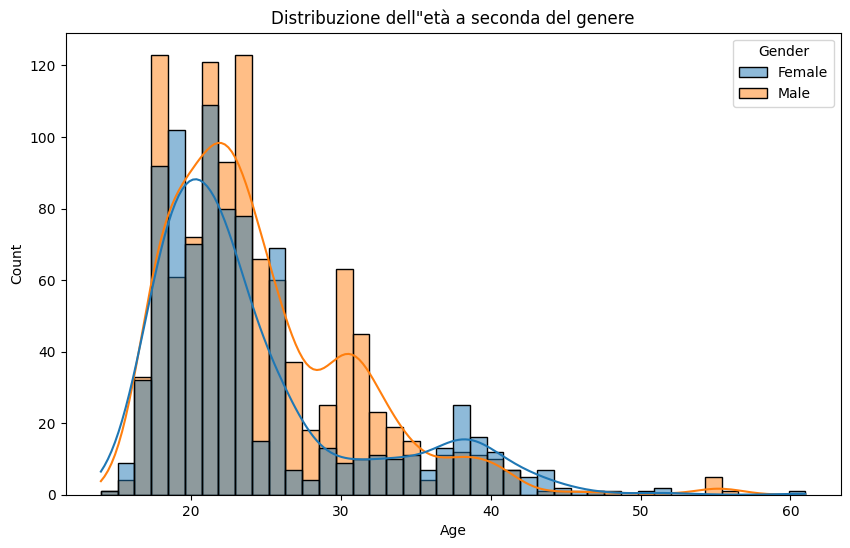

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

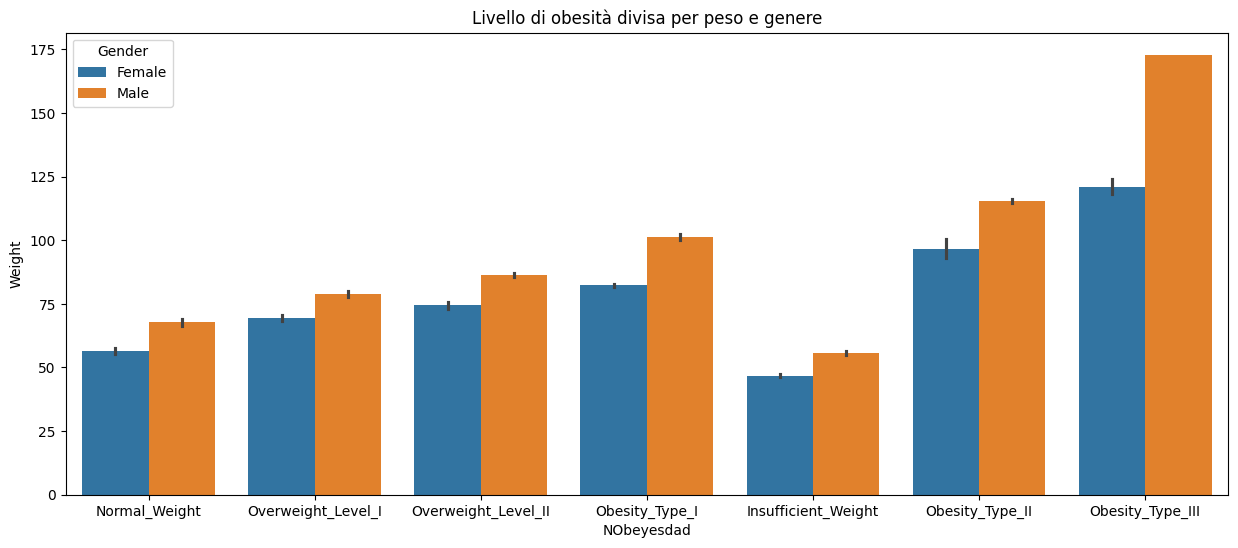

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

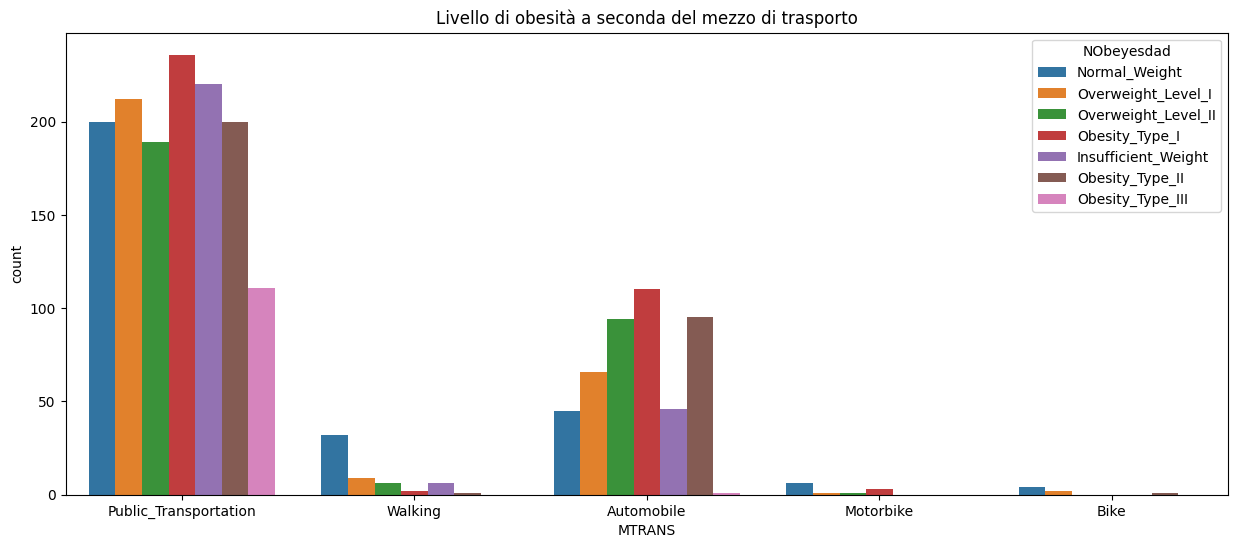

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

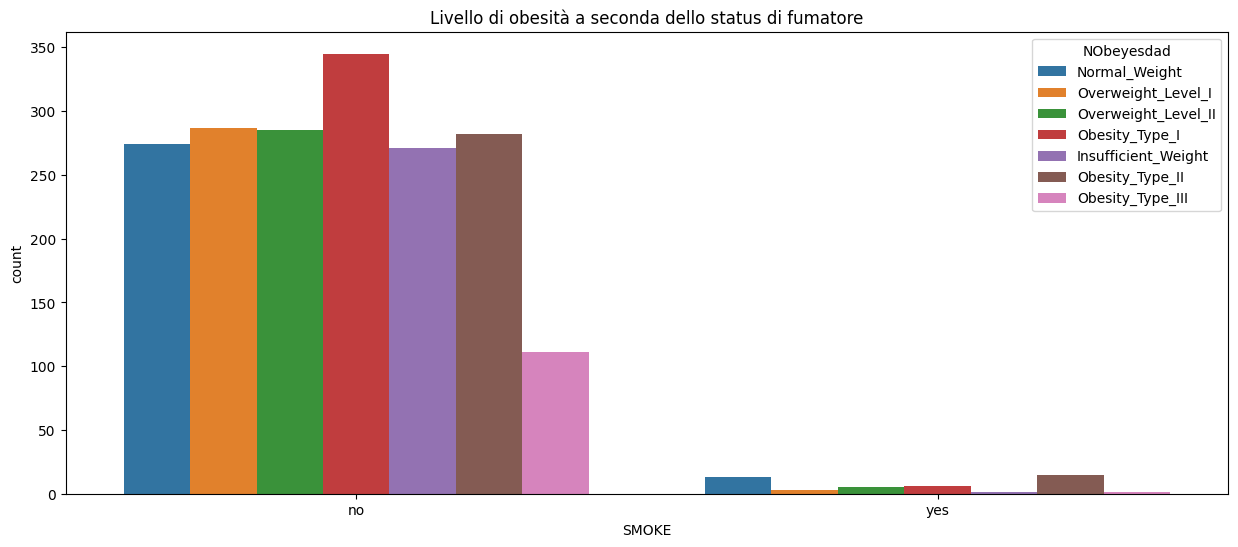

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

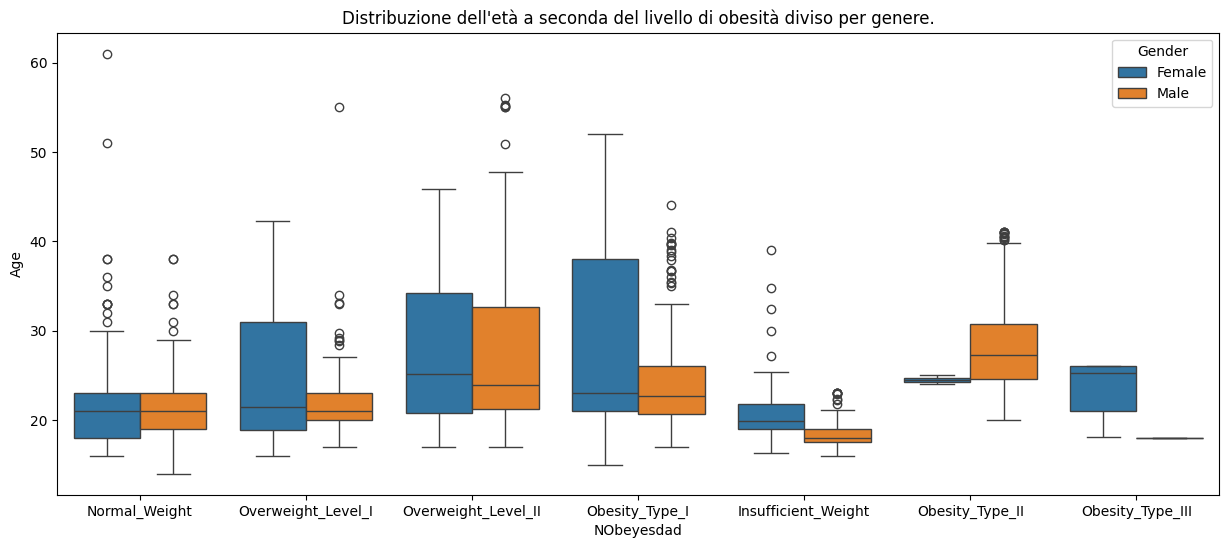

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()